#Bryan Camilo Hurtado Suarez - Analista de datos

Buenas tardes, espero tengan un gran día. En el presente cuaderno resolveré la prueba de Analítica. Muchas gracias por su atención

## 1. Análisis exploratorio de datos

El análisis exploratorio de datos (EDA) es un paso previo a la hora de comprender los datos con los que se va a trabajar. El objetivo de este análisis es explorar, describir, resumir y visualizar la naturaleza de los datos recogidos en las variables aleatorias de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos.

Realice el análisis exploratorio e indique los hallazgos o conclusiones al final de esta sección.

#### Datos

#### Python

En primer lugar, se cargan todas las librerias necesarias:



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#librerias para Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#librerias para balancear la cantidad de datos

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
id = '1vk7fWY4BGBpkqlk2YXWGFuL55HILW7Y7'
path = 'https://drive.google.com/uc?export=download&id='+id
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##Metodología

Con el fin de asegurar la calidad de los datos y un análisis efectivo se sigue el siguiente procedimiento:

* Exploración inicial
* Limpieza
* Análisis estadístico
* Análisis

###Exploración inicial

El objetivo de esta sección es familiarizarse con los datos, la forma en que están estructurados y lo que representa cada columna. De igual importancia, revisar la consistencia de los datos que es fundamental para el análisis

In [ ]:
df.shape

(10000, 14)

Se cuenta con 14 columnas y 10000 filas. Por lo tanto, se tienen los suficientes datos para realizar un análisis efectivo

Las columnas con las que se cuentan son las siguientes:

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

El tipo de cada una de las columnas es el siguiente:

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Luego, se realiza un primer vistazo a la base de datos:

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Se realiza un primer análisis estadístico de la base de datos con el fin de comenzar a comprender la distribución

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


De lo anterior, se evidencia que solo se cuenta con información de personas de entre: 18 y 92. Por otra parte, que el máximo salario  estimado es de 199992.48 y que el mínimo salario estimado es 11.58, lo cual probablemente sea un outlier y se requerirá manejar esto en la fase de limpieza.

####Verificar si existen datos Nulos/NA

Es de vital importancia conocer si existen datos perdidos dentro del dataset, ya que esto puede impactar significativamente el análisis y de ocurrir se debe definir una estrategia para manejarlo:

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Afortunadamente, se evidencia que es una bases de datos completa sin ningún dato perdido

####Verificar los valores numéricos

Ahora, se quiere observar la distribución de los datos y dar un primer vistazo a la existencia de datos atípicos(outliers):

In [ ]:
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].hist(bins=60, figsize =( 20 , 10))

NameError: ignored

Se evidencia que el 'creditScore' tiene una distribución asimétrica sesgada negativamente y 'age' tiene una distribución asimétrica sesgada positivamente. También, No se evidencia grandes Outliers, pero igualmente se hara un proceso para verificar esto en una etapa siguiente

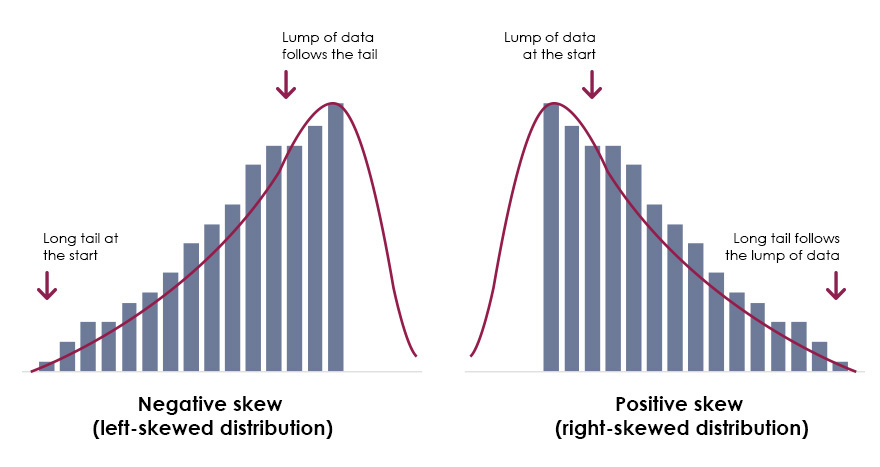

Luego, con el fin de complementar la anterior información, se grafican 'box plot' para cada uno de los datos numéricos, con el fin de evidenciar el posicionamiento de los quartiles y, por lo tanto, la distribución de los datos:



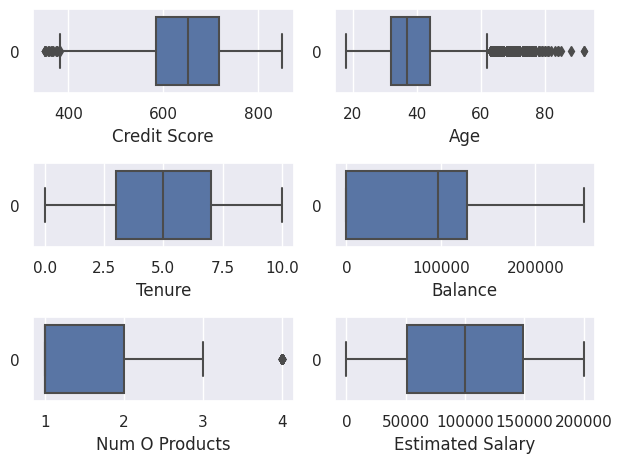

In [ ]:
sns.set()
fig, axes = plt.subplots(3, 2)

ax1 = sns.boxplot(data=df['CreditScore'], orient="h", ax=axes[0,0])
ax1.set(xlabel='Credit Score')

ax2 = sns.boxplot(data=df['Age'], orient="h", ax=axes[0,1])
ax2.set(xlabel='Age')

ax3 = sns.boxplot(data=df['Tenure'], orient="h", ax=axes[1,0])
ax3.set(xlabel='Tenure')

ax4 = sns.boxplot(data=df['Balance'], orient="h", ax=axes[1,1])
ax4.set(xlabel='Balance')

ax5 = sns.boxplot(data=df['NumOfProducts'], orient="h", ax=axes[2,0])
ax5.set(xlabel='Num O Products')

ax6 = sns.boxplot(data=df['EstimatedSalary'], orient="h", ax=axes[2,1])
ax6.set(xlabel='Estimated Salary')


plt.tight_layout()
plt.show()

No existen grandes outliers dentro del dataset, luego , en la fase de limpieza se definirá la estrategia para manejar los outliers y se implementara.

####Valores Categóricos

Se realiza un primer acercamiento a la distribución de los datos en cuanto los valores categóricos. Con el fin de empezar a ganar una mayor comprensión de los datos:

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Se evidencia que el país donde la mayoria de clientes esta ubicado es Francia

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Se observa que se cuenta con mayor información de Hombres. Aunque, no esta muy distante de las mujeres

#### Valores booleanos

Se conviertesn las variables booleans al tipo bool

In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['IsActiveMember'] = df['IsActiveMember'].astype(bool)
df['Exited'] = df['Exited'].astype(bool)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard             bool
IsActiveMember        bool
EstimatedSalary    float64
Exited                bool
dtype: object

Ahora, se mira la distribución de estas variables:

In [ ]:
df['HasCrCard'].value_counts()

True     7055
False    2945
Name: HasCrCard, dtype: int64

In [ ]:
df['IsActiveMember'].value_counts()

True     5151
False    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df['Exited'].value_counts()

False    7963
True     2037
Name: Exited, dtype: int64

###Limpieza

El objetivo de esta sección es limpiar la bases de datos con el fin de poder realizar un buen análisis, en esta base de datos lo único que se debe hacer en esta parte es manejar los outliers



####Valores numéricos - eliminar outliers

El procedimiento para manejar los outliers es el siguiente:

1.   Se calculan los cuartiles para cada variable
2.   Se calcula el rango intercuartil(IQR) de la siguiente forma Q3-Q1, tener en cuenta que el IQR es una medida de la dispersión de los datos
3.  Se calcula el límite superior para los valores atípicos. Se obtiene sumando 1.5 veces el IQR al tercer cuartil. Los valores superiores a este límite se considerarán valores atípicos.
4. Se calcula el límite inferior para los valores atípicos. Se obtiene restando 1.5 veces el IQR al primer cuartil. Los valores inferiores a este límite se considerarán valores atípicos
5. Se ajustan los valores que están por debajo del límite inferior de manera que sean iguales al valor mínimo de los valores que están dentro del rango aceptable
6. se ajustan los valores que están por encima del límite superior de manera que sean iguales al valor máximo de los valores que están dentro del rango aceptable

Recordar que todo esto se basa en los Cuartiles, medida que me permite conocer el posicionamiento de los datos y su dispersión

Se crea una función que realice todo este proceso:

In [ ]:
def handle_outliers(df):

    stats = df.describe()
    Q1 = stats.loc['25%']
    Q3 = stats.loc['75%']
    IQR = Q3 - Q1
    max_contiction = Q3 + (1.5 * IQR)
    min_contiction = Q1 - (1.5 * IQR)

    for i, column in enumerate(df.columns):
        df.loc[df[column] < min_contiction[i], column] = df.loc[df[column] >= min_contiction[i], column].min()
        df.loc[df[column] > max_contiction[i], column] = df.loc[df[column] <= max_contiction[i], column].max()

    return df

Se realiza el manejo de los Outliers:

In [ ]:
df_no_outliers = handle_outliers(df[['CreditScore','Age','Balance','EstimatedSalary']])

In [ ]:
df_no_outliers.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

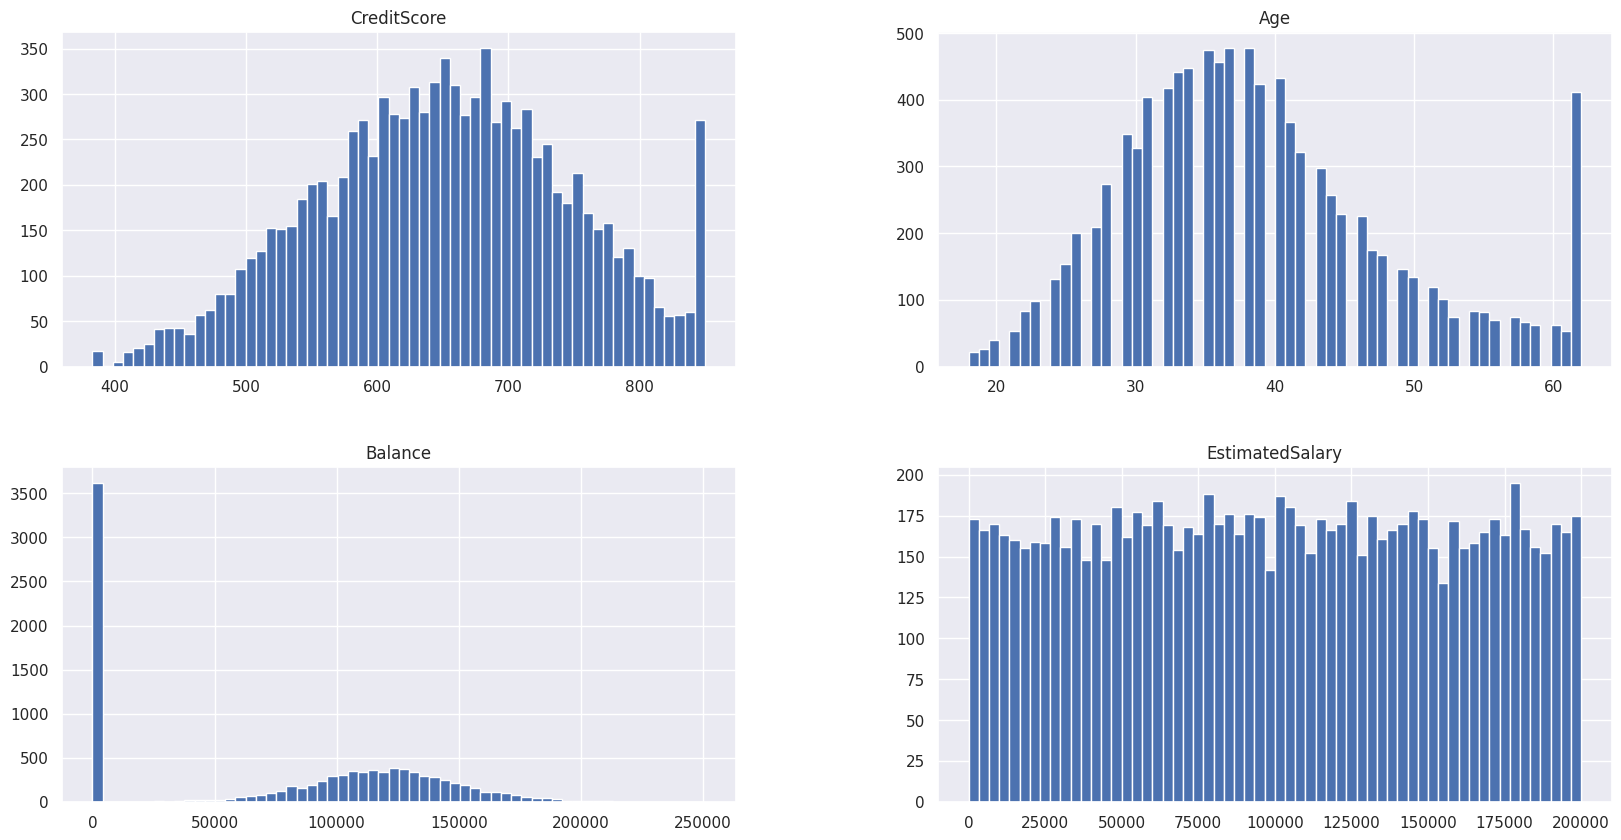

In [ ]:
df_no_outliers.hist(bins=60, figsize =( 20 , 10))

De esta forma se evidencia de manera clara el comportamiento de cada variable, y de igual forma los outliers ya no estan presentes.

Se procede a revisar el comportamiento de los cuartiles:

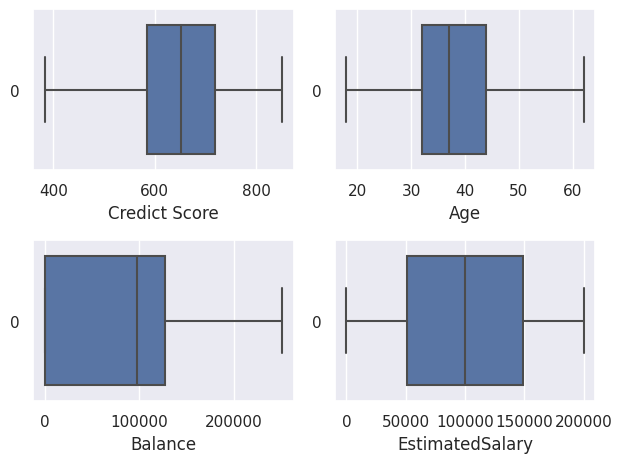

In [ ]:
sns.set()
fig, axes = plt.subplots(2, 2)

ax1 = sns.boxplot(data=df_no_outliers['CreditScore'], orient="h", ax=axes[0,0])
ax1.set(xlabel='Credict Score')

ax2 = sns.boxplot(data=df_no_outliers['Age'], orient="h", ax=axes[0,1])
ax2.set(xlabel='Age')



ax4 = sns.boxplot(data=df_no_outliers['Balance'], orient="h", ax=axes[1,0])
ax4.set(xlabel='Balance')

ax5 = sns.boxplot(data=df_no_outliers['EstimatedSalary'], orient="h", ax=axes[1,1])
ax5.set(xlabel='EstimatedSalary')




plt.tight_layout()
plt.show()


De igual forma, se puede apreciar la dispersión de los valores de una manera más clara

Ahora, se eliminan las columnas con outliers del Dataframe original y se agregan de nuevo, pero ahora con la estrategia de outliers implementada:

In [ ]:
df = df.drop(['CreditScore'], axis=1)
df = df.drop(['Age'], axis=1)
df = df.drop(['Balance'], axis=1)
df = df.drop(['EstimatedSalary'], axis=1)
df = df.drop(['CustomerID'])


In [ ]:
df_2 = pd.concat([df, df_no_outliers], axis=1)

In [ ]:
df_2.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Balance,EstimatedSalary
0,1,15634602,Hargrave,France,Female,2,1,True,True,True,619,42,0.00,101348.88
1,2,15647311,Hill,Spain,Female,1,1,False,True,False,608,41,83807.86,112542.58
2,3,15619304,Onio,France,Female,8,3,True,False,True,502,42,159660.80,113931.57
3,4,15701354,Boni,France,Female,1,2,False,False,False,699,39,0.00,93826.63
4,5,15737888,Mitchell,Spain,Female,2,1,True,True,False,850,43,125510.82,79084.10


###Análisis estadístico inicial

En esta sección se quiere tener un mejor entendimiento del comportamiento de las variables y su relación

Correlacion entre variables

In [ ]:
df_corr = df_2[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.007703,0.000721,0.006389,0.012199,-0.001150
Age,-0.007703,1.000000,-0.011163,0.033021,-0.032381,-0.007392
Tenure,0.000721,-0.011163,1.000000,-0.012254,0.013444,0.007784
Balance,0.006389,0.033021,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012199,-0.032381,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001150,-0.007392,0.007784,0.012797,0.014204,1.000000


<Axes: >

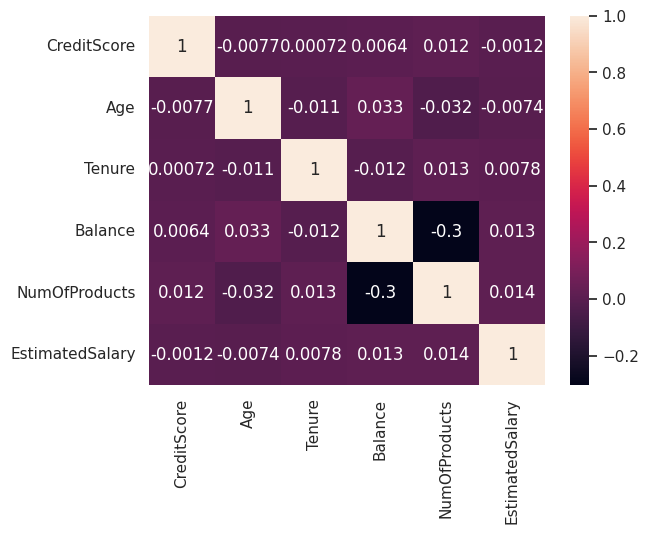

In [ ]:
sns.heatmap(df_corr, annot=True)

Se evidencia que no existe una correlación causal dentro de las variables, lo cual será de uso al momento de crear el modelo de machine learning



###Análisis Propio

El objetivo de esta sección es obtener insights acerca la bases de datos y las tendencias que puedan ser deducidas de esta

En primer lugar, visualizamos la distribución geográfica usando un gráfico de barras

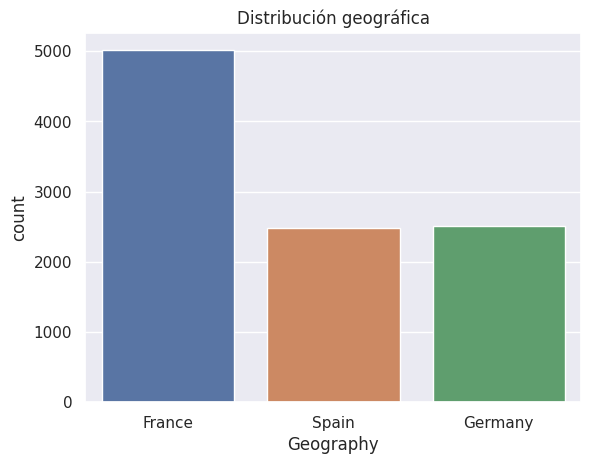

In [ ]:
sns.countplot(x='Geography', data=df_2)
plt.title('Distribución geográfica')
plt.show()

Luego, visualizamos la distribución de género usando un gráfico de barras

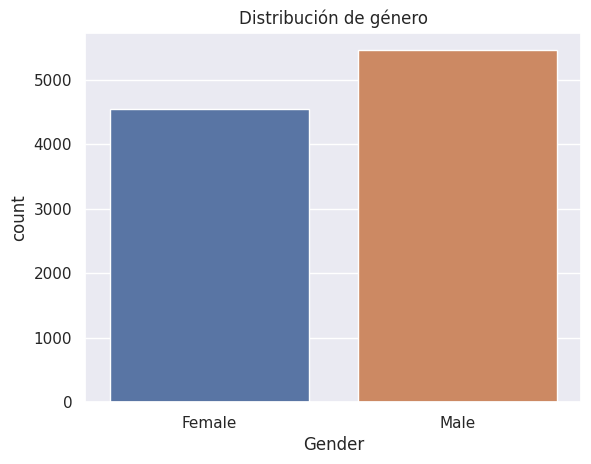

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Distribución de género')
plt.show()

Entonces, visualizamos la distribución de clientes que abandonaron el banco usando un gráfico de barras, esta es clave, ya que es nuestra variable objetivo y podemos observar que será un problema desbalanceado en cuanto a Machine Learning:

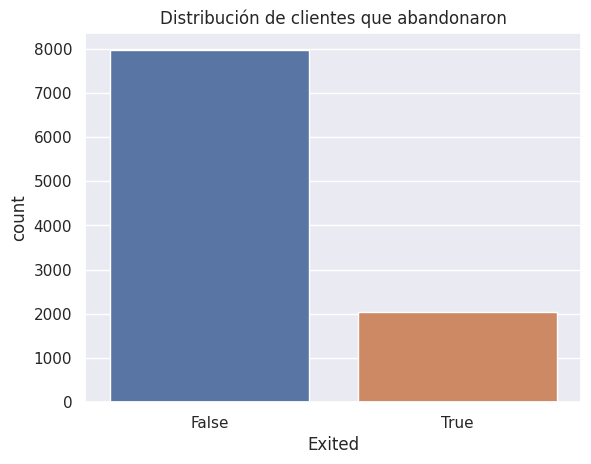

In [ ]:
sns.countplot(x='Exited', data=df_2)
plt.title('Distribución de clientes que abandonaron')
plt.show()

Se realiza un histograma de la edad:

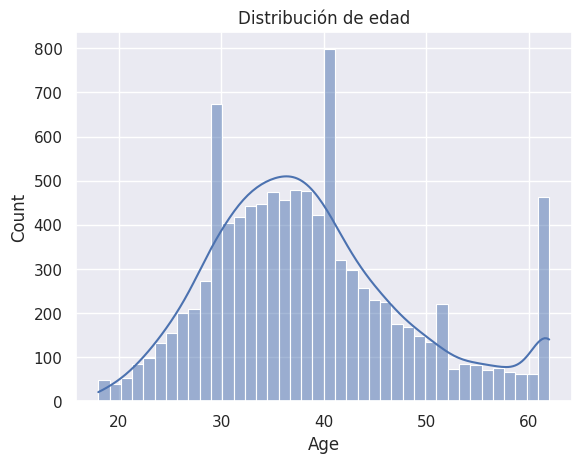

In [ ]:
sns.histplot(data=df_2, x='Age', kde=True)
plt.title('Distribución de edad')
plt.show()

Podemos obervar que la mayoria de Clientes esta entre la edad de 30-40 años

Ahora, sé gráfica la distribución del puntaje crediticio por cada país

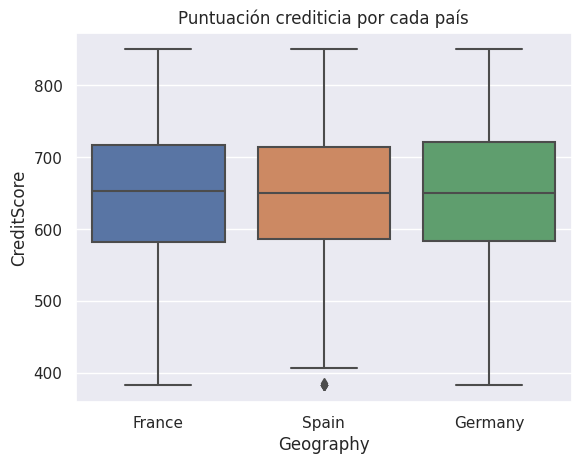

In [ ]:
sns.boxplot(x='Geography', y='CreditScore', data=df_2)
plt.title('Puntuación crediticia por cada país')
plt.show()

Podemos observar que son bastante similares

Luego, se muestra la puntuación crediticia teniendo en cuenta país y abandono:

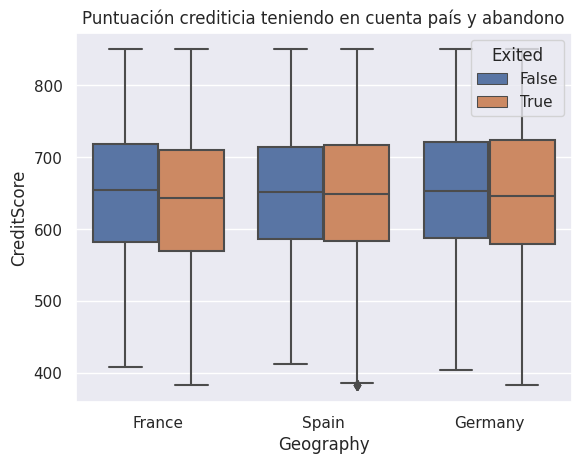

In [ ]:
sns.boxplot(x='Geography', y='CreditScore', hue='Exited', data=df_2)
plt.title('Puntuación crediticia teniendo en cuenta país y abandono')
plt.show()

Se evidencia que se tiene un comportamiento similar entre los países, igualmente con el caso de que el cliente abandonara el banco

Finalmente, se observa el sa aldo bancario promedio según si el cliente abandono

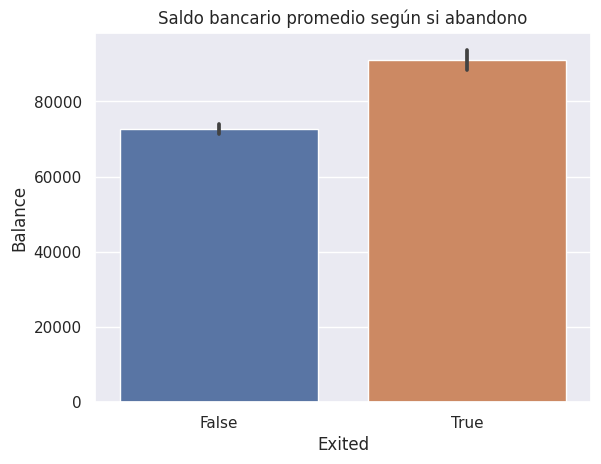

In [ ]:
sns.barplot(x='Exited', y='Balance', data=df_2)
plt.title('Saldo bancario promedio según si abandono')
plt.show()

Se evidencia que los clientes que salieron del banco contaban con un balance mayor en promedio

## 2. Construcción del modelo analítico

En esta sección el objetivo es que construya un prototipo rápido de un modelo analítico y lo guarde. Es importante que nos cuente porque eligió este modelo, es decir, que vio en los datos para creer que un modelo como este podría funcionar bien. Adicional, suponga que le va a presentar esté modelo a un usuario que le parece importante tener un modelo que sea preciso, pero que también cuyos resultados puedan ser interpretables de alguna manera.

* ¿Es su modelo interpretable?
* Si no es interpretable ¿Hay alguna forma de hacerlo interpretable?
* ¿Por qué escogio este modelo?

En primera instancia se decide que variables usar y se eliminan las columnas que no son relevantes para la predicción:

In [ ]:
df_final = df_2.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

Se eliminan las anteriores dado que son para identificar el cliente, pero no son relevantes a la hora de crear un modelo de machine learning. Luego, se continúa con todas las demás variables, ya que considero que pueden aportar al modelo y como se evidenció anteriormente,  la correlación entre ellas es baja y cada una puede ser relevante para el problema

Se empieza a prepara los datos para el modelo:

In [ ]:
x = df_final
x = x.drop(columns=['Exited'])
y = df_final['Exited']

Luego, las variables que se usaran para seran las siguientes:

In [ ]:
x.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary
0,France,Female,2,1,True,True,619,42,0.00,101348.88
1,Spain,Female,1,1,False,True,608,41,83807.86,112542.58
2,France,Female,8,3,True,False,502,42,159660.80,113931.57
3,France,Female,1,2,False,False,699,39,0.00,93826.63
4,Spain,Female,2,1,True,True,850,43,125510.82,79084.10


Las variable objetivo es 'Exited', que se representara por la letra y de la forma siguiente:

In [ ]:
y.head()

0     True
1    False
2     True
3    False
4    False
Name: Exited, dtype: bool

In [ ]:
x.shape

(10000, 10)

In [ ]:
print("Distribución total de la clases: ",Counter(y))

Distribución total de la clases:  Counter({False: 7963, True: 2037})


Se  recuerda que se cuenta con 10000 registros para ahora sol se usaran 10 variables de las 14 originales, plus la variable objetivo

In [ ]:
x.dtypes

Geography           object
Gender              object
Tenure               int64
NumOfProducts        int64
HasCrCard             bool
IsActiveMember        bool
CreditScore          int64
Age                  int64
Balance            float64
EstimatedSalary    float64
dtype: object

Se crean las instancias para preprocesar los datos, en el caso de la variables cuantitativas se aplicara StandardScaler para estandariazarlos. Para las variables cualitativas se aplicara One Hot Encoder para el uso de estas en procesos de Machine Learning:

In [ ]:
cualitativa_ajustar = Pipeline(steps=[ ('encoder', OneHotEncoder(handle_unknown='ignore')) ])

In [ ]:
categorical_x = x.select_dtypes(include=['object', 'bool']).columns

In [ ]:
preprocesamiento_cat = ColumnTransformer(transformers=[ ('cualitativa',cualitativa_ajustar ,categorical_x) ])

In [ ]:
x_cat = x[['Geography','Gender','HasCrCard','IsActiveMember']]

In [ ]:
x_cat

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,True,True
1,Spain,Female,False,True
2,France,Female,True,False
3,France,Female,False,False
4,Spain,Female,True,True
...,...,...,...,...
9995,France,Male,True,False
9996,France,Male,True,True
9997,France,Female,False,True
9998,Germany,Male,True,False


In [ ]:
x = x.drop(columns=['Geography'])
x = x.drop(columns=['Gender'])
x = x.drop(columns=['HasCrCard'])
x = x.drop(columns=['IsActiveMember'])

En primer lugar, se aplica la transformación para las variables categóricas, donde se aplicara el metodo 'one hot encoder':

In [ ]:
xt = preprocesamiento_cat.fit_transform(x_cat)

In [ ]:
xt = pd.DataFrame(xt)

In [ ]:
xt

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
x = pd.concat([x.reset_index(drop=True), xt], axis=1)

In [ ]:
x

,Tenure,NumOfProducts,CreditScore,Age,Balance,EstimatedSalary,0,1,2,3,4,5,6,7,8
0,2,1,619,42,0.00,101348.88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1,608,41,83807.86,112542.58,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,8,3,502,42,159660.80,113931.57,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1,2,699,39,0.00,93826.63,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2,1,850,43,125510.82,79084.10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,771,39,0.00,96270.64,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,10,1,516,35,57369.61,101699.77,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,7,1,709,36,0.00,42085.58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,3,2,772,42,75075.31,92888.52,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


A continuación se dividen los datos en set de entrenamiento, validación y test. En este caso se usa la convención usual para elegír que porcentaje de datos corresponden a cada set, es decir, se deja un 30% para test y 70% para entrenamiento.

En este caso se tienen 10000 datos por lo cual se separan 7000 para entrenamiento y 3000 datos para test.

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size = 0.30,random_state=1000)

In [ ]:
print("Distribución total de la clases, en los datos de entranamiento, antes de aplicar oversampling y undersampling: ",Counter(y_train))

Distribución total de la clases, en los datos de entranamiento, antes de aplicar oversampling y undersampling:  Counter({False: 5596, True: 1404})


Ahora, se aplica un proceso de estandarización para los datos numéricos, se hace en este punto porque ya se han separado los datos de entrenamiento y test, y no queremos que los de entrenamiento tengan alguna clase de información de los datos de test. Entonces, se hace el proceso para cada uno:

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_num = x_train[['Tenure','NumOfProducts','CreditScore','Age','Balance','EstimatedSalary']]

In [ ]:
x_train = x_train.drop(columns=['Tenure'])
x_train = x_train.drop(columns=['NumOfProducts'])
x_train = x_train.drop(columns=['CreditScore'])
x_train = x_train.drop(columns=['Age'])
x_train = x_train.drop(columns=['Balance'])
x_train = x_train.drop(columns=['EstimatedSalary'])

In [ ]:
x_test_num = x_test[['Tenure','NumOfProducts','CreditScore','Age','Balance','EstimatedSalary']]

In [ ]:
x_test = x_test.drop(columns=['Tenure'])
x_test = x_test.drop(columns=['NumOfProducts'])
x_test = x_test.drop(columns=['CreditScore'])
x_test = x_test.drop(columns=['Age'])
x_test = x_test.drop(columns=['Balance'])
x_test = x_test.drop(columns=['EstimatedSalary'])

In [ ]:
scaler.fit(x_train_num)

StandardScaler()

Se aplica la misma transformación:

In [ ]:
X_train = scaler.transform(x_train_num)
X_test = scaler.transform(x_test_num)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
x_train.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
6996,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6997,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
6998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
x_train = pd.concat([x_train.reset_index(drop=True), X_train], axis=1)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.040461,-0.899280,-0.326151,0.029461,0.222740,-1.277090
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.693558,-0.899280,-1.379078,-0.589529,0.805148,0.346995
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,-1.040461,0.819246,0.788713,0.545286,-1.240936,-1.274394
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.040362,-0.899280,1.841641,-1.105354,0.925069,-0.359951
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.040362,-0.899280,1.521633,0.648451,-1.240936,0.435146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.040362,-0.899280,0.582257,0.338956,0.292144,-0.422920
6996,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.040461,-0.899280,1.036461,-0.589529,1.206909,-0.499361
6997,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.346754,-0.899280,-0.997134,0.235791,1.089129,-1.402796
6998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.387265,-0.899280,0.200313,-0.176869,0.776605,1.080739


In [ ]:
x_test = pd.concat([x_test.reset_index(drop=True), X_test], axis=1)

In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.387165,0.819246,-0.284860,0.338956,-1.240936,0.331176
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.733969,-0.899280,-1.265527,0.751616,0.871193,-0.784109
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.040362,2.537772,0.706131,1.370606,0.036410,-1.175559
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.693558,0.819246,-0.997134,0.338956,-1.240936,-1.605500
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.346754,-0.899280,-0.119695,1.886431,-1.240936,-1.153748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.693657,0.819246,0.509997,-0.692694,-1.240936,1.228613
2996,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.733969,-0.899280,0.334509,-1.105354,1.985163,-0.298838
2997,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.733969,0.819246,0.189990,-0.176869,1.217446,1.034248
2998,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.040362,-0.899280,-0.315828,-0.383199,0.885303,-0.597553


Dado que es un probelama imbalanceado se procede a usar herramientas para esta clase de situaciones, en este caso de combinan undersampling con Oversampling:

In [ ]:
under = RandomUnderSampler(random_state=42)
over = SMOTE(random_state=42)

x_train, y_train= over.fit_resample(x_train, y_train)
x_train, y_train= under.fit_resample(x_train, y_train)

In [ ]:
print("Distribución total de la clases despues de aplicar oversampling y undersampling(entrenamiento): ",Counter(y_train))

Distribución total de la clases despues de aplicar oversampling y undersampling(entrenamiento):  Counter({False: 5596, True: 5596})


Con los datos procesados se procede a usar diferentes herramientas de Machine learning.

Dado es un problema de clasificación, se procede a usar algoritmos usados en la academia e industria para este tipo de casos, dado que es un modelado rápido, solo intentaré tres algoritmos, me quedaré con el que mejor se desempeñe:



*   Regresión logística

*   Árboles de Decisión

*   Gradient Boost



####Regresión logística:


In [ ]:
modelo_regl = LogisticRegression(solver='lbfgs',random_state=1000)

In [ ]:
entrenamiento_modelo=modelo_regl.fit(x_train, y_train)
predecciones=modelo_regl.predict(x_test)
print( 'precisión datos de entrenamiento (accuracy):',modelo_regl.score(x_train,y_train))
print('precisión datos de test (accuracy):',modelo_regl.score(x_test,y_test))

precisión datos de entrenamiento (accuracy): 0.7170300214438885
precisión datos de test (accuracy): 0.7193333333333334


In [ ]:
cm = confusion_matrix(y_test, predecciones)

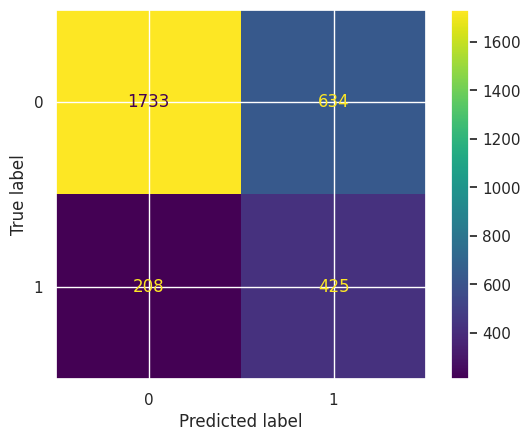

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

F1:

In [ ]:
f1_score(y_test, predecciones, average='weighted')

0.7407885115602179

El área bajo la curva ROC:

In [ ]:
roc_auc_score(y_test, predecciones)

0.70177820225574

####Árboles de Decisión

In [ ]:
modelo_tree = DecisionTreeClassifier(max_depth = 10 ,random_state = 1000)

In [ ]:
entrenamiento_modelo=modelo_tree.fit(x_train, y_train)
predecciones=modelo_tree.predict(x_test)
print( 'precisión datos de entrenamiento (accuracy):',modelo_tree.score(x_train,y_train))
print('precisión datos de test (accuracy):',modelo_tree.score(x_test,y_test))

precisión datos de entrenamiento (accuracy): 0.8802716225875625
precisión datos de test (accuracy): 0.7896666666666666


In [ ]:
cm = confusion_matrix(y_test, predecciones)

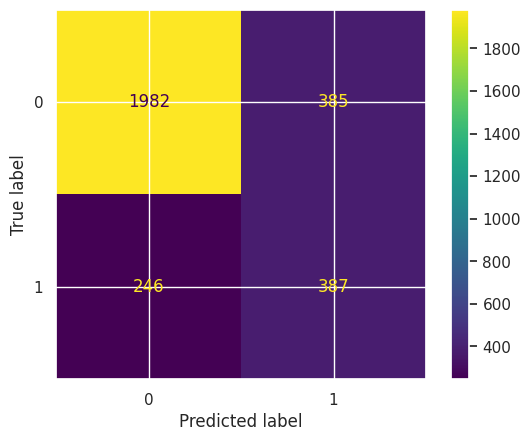

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

F1:

In [ ]:
f1_score(y_test, predecciones, average='weighted')

0.7968897354776002

El área bajo la curva ROC:

In [ ]:
roc_auc_score(y_test, predecciones)

0.7243606300694582

#### Gradient Boost

In [ ]:
modelo_gra = GradientBoostingClassifier(random_state=1000)

In [ ]:
entrenamiento_modelo=modelo_gra.fit(x_train, y_train)
predecciones=modelo_gra.predict(x_test)
print( 'precisión datos de entrenamiento (accuracy):',modelo_gra.score(x_train,y_train))
print('precisión datos de test (accuracy):',modelo_gra.score(x_test,y_test))

precisión datos de entrenamiento (accuracy): 0.8813438170121516
precisión datos de test (accuracy): 0.843


In [ ]:
cm = confusion_matrix(y_test, predecciones)

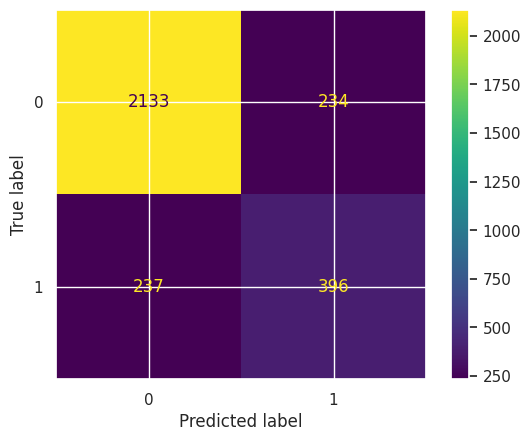

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

F1:

In [ ]:
f1_score(y_test, predecciones, average='weighted')

0.8428632542018989

El área bajo la curva ROC:

In [ ]:
roc_auc_score(y_test, predecciones)

0.7633665507361289

Finalmente, ROC_AUC es una medida que indica que tanto el modelo es capaz de
distinguir entre clases y será la medida para seleccionar el modelo, teniendo en cuenta que es un problema no balanceado. Luego,
en este caso el modelo con mejor desempeño en esta métrica es Gradient
Boost, por lo tanto, será el modelo utilizado para predecir que clientes podrían abandonar el banco, y de esta forma formular estrategias para retención de estos

¿Es su modelo interpretable?

El modelo es interpretable para cualquier persona, ya que introduciendo la información de cualquier cliente se puede predecir si cerrara la cuenta o no, arrojando como salida 0 o 1, por lo tanto, cualquier persona no técnica puede entender el funcionamiento de esta y llegar a usarla, claro, después de adecuar el modelo en una página o app pertinente. De igual forma, para una persona con conocimientos en estadística podemos asegurar que el modelo tiene una buena performance, teniendo un ROC_AUC de 76%. Luego, esto es mejorable. Pero para un primer modelado es un buen resultado

¿Por qué escogió este modelo? Fue elegido por tener la mejor performance de entre los modelos entrenados, en este caso, como se dijo anteriormente, lo determinante fue el valor del ROC_AUC. Luego, sé probo este modelo, Gradient Boost, porque es usado en la industria y la academia en problemas de clasificación. Ya que son efectivos dado que combina diferentes modelos de machine learning para mejorar el desempeño y de igual forma elegir la respuesta

## 3. Conclusiones

Describa los resultados obtenidos de su modelo y defina posibles recomendaciones o sugerencias que se puedan derivar de éstos resultados.







*   El modelo, Gradient Boosting tiene una buena performance, teniendo un ROC_AUC de 76%, lo cual se considera aceptable
*   El modelo es interpretable para cualquier persona, ya que introduciendo la información de cualquier cliente se puede predecir si cerrara la cuenta o no, arrojando como salida 0 o 1



Para el futuro:

El modelo aún tiene un gran margen de mejora. Por ejemplo, se podría
variar las características de este para encontrar un mejor resultado o usar otros modelos de machine learning como redes neuronales. Igualmente con un poco más de tiempo se puede complementar todo con otras técnicas como lo puede de regularización

Luego, se propone la siguente solución en la nube:


Implementaria una "GCP solution" aprovechando las herramientas y eventajas que ofrece esta plataforma,
algunas de estas son:
Latencia minima
Mayor velocidad de procesamiento
Minimas actividades de mantenimiento
Escalable facilmente
Obtener resultados de datos en tiempo real
En primer lugar, se haria uso del servicio "Cloud Pub/Sub" que permite agregar datos de diferentes fuentes
como bases de datos, dipositivos(computadores, celulares), entre otros. Luego, los datos serian enviados al
servicio "Cloud Dataflow" el cual se encargaria del procesamiento (filtrar, transformar). Entonces, estos datos
necesitan ser almacenados en un "Data Warehouse" para lo cual se usuaria el servicio "Bigquery" en la cual se
podra consultar la información para realizar reportes (gráficos, informes, entre otros).Finalmente, se usuaria el
servicio "Cloud ML" para implementar el modelos anteriormete explicado, obteniendo la información de
"Bigquery" y enviando la información obtenida del modelo a "Cloud Dataflow" para que se pueda informar de los
resultados. Como agregado si se cuenta información de otras fuentes se pueden conectar otros servicios a
"Cloud Dataflow" como "Cloud SQL" y "BigTable". De igual forma si se necesita modificar los datos de
"Bigquery" estos pueden ser enviados a Cloud Dataflow" donde se transformaran para luego volver a
"Bigquery".

####Muchas Gracias por la atención prestada! Feliz Día! =)